# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

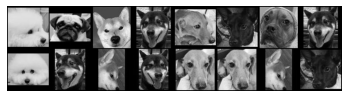

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
Epoch number 0
 Current loss 1.2078546285629272

Epoch number 1
 Current loss 35.957359313964844

Epoch number 2
 Current loss 57.16034698486328

Epoch number 3
 Current loss 42.246429443359375

Epoch number 4
 Current loss 10.857726097106934

Epoch number 5
 Current loss 16.343069076538086

Epoch number 6
 Current loss 7.685677528381348

Epoch number 7
 Current loss 17.466970443725586

Epoch number 8
 Current loss 10.952396392822266

Epoch number 9
 Current loss 7.9410552978515625

Epoch number 10
 Current loss 13.26762866973877

Epoch number 11
 Current loss 1.232079267501831

Epoch number 12
 Current loss 2.4201714992523193

Epoch number 13
 Current loss 7.5385026931762695

Epoch number 14
 Current loss 7.324954986572266

Epoch number 15
 Current loss 11.976733207702637

Epoch number 16
 Current loss 3.781888961791992

Epoch number 17
 Current loss 3.691135883331299

Epoch number 18
 Current loss 2.3373591899871826

Epoch number 19
 C

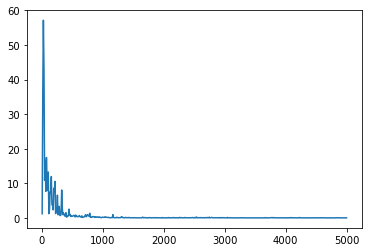

In [1]:
from SiameseNetworkDataset import SiameseNetworkDataset
from config import Config
from contrastiveLoss import ContrastiveLoss
from siameset import SiameseNetwork
from Util import *



   

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()



folder_dataset = dset.ImageFolder(root=Config.training_dir+"/dog")

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())



train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=Config.train_batch_size)              

net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005 )                        


counter = []
loss_history = [] 
iteration_number= 0


for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0, img1 , label
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
show_plot(counter,loss_history)

PATH = "./dognet.pt"
torch.save(net.state_dict(),PATH)